# Cours de Python chez Arc


## Présentation de l'intérêt des "notebooks"

Entrée / sortie de résultat (il faut appuyer sur "maj-entrée" pour valider la cellule et en créeer une nouvelle.

In [2]:
ma_variable = 2
print(ma_variable)

2


Les graphiques fait avec `matplotlib` sont intégrés automatiquement aux notebooks (sinon, il faut appeler `plt.show()` pour afficher les fenêtres). 

On peut indiquer à matplotlib de rendre les documents intéractifs en utilisant `%matplotlib notebook` (dans ce cas, il faudra créer une figure à chaque nouveau plot, sinon les choses à affichées sont ajoutées au graphe précédent). 

In [3]:
import matplotlib.pyplot as plt

%matplotlib notebook

<IPython.core.display.Javascript object>


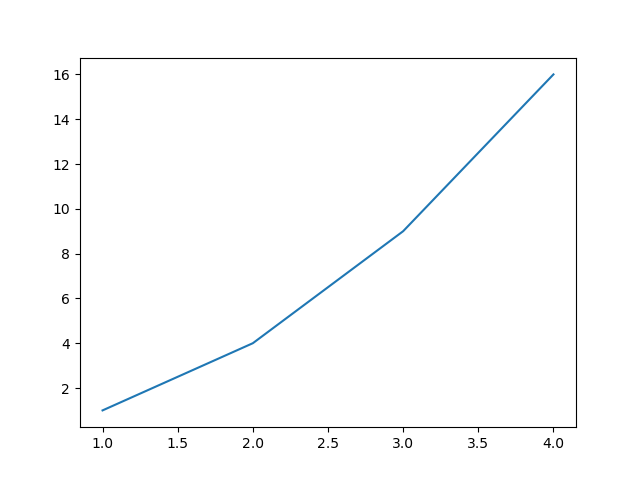

In [4]:
xs = [1, 2, 3, 4]

def mise_au_carre_1(xs):
    """
    A ne pas faire. Globalement, en python, on n'utilise très rarement la construction 
    range(len(xs)). 
    """
    ys = []
    for index in range(len(xs)):
        x = xs[index]
        ys.append(x)
    return ys

def mise_au_carre_2(xs):
    """
    Mieux. On parcours directement les éléments. 
    """
    ys = []
    for x in xs:
        ys.append(x ** 2)
    return xs

def mise_au_carre_3(xs):
    ys = [x**2 for x in xs]
    return ys
    
    
ys = mise_au_carre_3(xs)
plt.plot(xs, ys)

## Intérêt des bonnes pratiques

Un bon nomage de variables peut remplacer / compléter une documentation annexe. 
Il ne faut surtout pas que des varaibles aient un nom qui ne correspondent pas à ce quelles contiennent.

Dans le code suivant, on va parcourir tous les fichiers depuis le répertoire grand parent (`../..`), ne garder que les ficheirs se terminant par `*.py` et retourner les noms de fichiers sans l'extension (en utilisant le slicing)

In [5]:
from pathlib import Path

In [6]:
p = Path("../../")
all_files = p.rglob('*.py')
# names = [f.name[:-3] for f in all_files]

"""
names = []
for f in all_files:
    name_without_extension = f.name[:-3]
    names.append(name_without_extension)
print(names)
"""

def sans_extension(nom):
    return nom[:-3]

names = [sans_extension(f.name) for f in all_files]
print(names[:10])

['demo_debug', 'exemple_plot', 'appdirs', 'easy_install', 'mypy_extensions', 'typing_extensions', '_black_version', 'compatibility', 'current_thread_executor', 'local']


## Manipulation d'itérable 

En python on peut très facilement manipuler des itérable 

* accès à une valeur `l[0]` : le premier élément
* accès à une section `l[5:10]` : de l'index 5 à 10 (le 10ème étant exclus)


In [7]:
a = ["p", "l", "o", "p", ".", "p", "y"]
a = "plop.py"
a[:-3]

'plop'

## Gestion des noms 

Une variable ou fonction doit être déclarée / initialisée avant d'être utilisée. 

In [8]:
all_files = p.rglob('*.py')
print([eyujijythgrd(f.name) for f in all_files])

def eyujijythgrd(nom):
    return nom[:-3]

NameError: name 'eyujijythgrd' is not defined

Ce qui compte c'est le moment où l'on utilise la variable (si c'est dnas une fonction, c'est le moment où l'on exécute la fonction). 

In [9]:
def toto():
    tata()

def tata():
    print("salut")


toto()

salut


Et les variables passées par closure sont en *late binding*. La valeur utilisée est celle qui existe au moment où la fonction est exécutée.

In [10]:
def print_variable():
    print(variable)
    
variable = 1
print_variable()
variable = "toto"
print_variable()

1
toto


## Fizzbuzz

La première version est la version "naïve", qui suit ce que dit l'algorithme, sans utiliser les capacitées de python. 

In [11]:
for nombre in range(1, 101):
    if nombre % 3 == 0 and nombre % 5 == 0:
        print("fizzbuzz")
    elif nombre % 3 == 0:
        print("fizz")
    elif nombre % 5 == 0:
        print("buzz")
    else:
        print(nombre)

1
2
fizz
4
buzz
fizz
7
8
fizz
buzz
11
fizz
13
14
fizzbuzz
16
17
fizz
19
buzz
fizz
22
23
fizz
buzz
26
fizz
28
29
fizzbuzz
31
32
fizz
34
buzz
fizz
37
38
fizz
buzz
41
fizz
43
44
fizzbuzz
46
47
fizz
49
buzz
fizz
52
53
fizz
buzz
56
fizz
58
59
fizzbuzz
61
62
fizz
64
buzz
fizz
67
68
fizz
buzz
71
fizz
73
74
fizzbuzz
76
77
fizz
79
buzz
fizz
82
83
fizz
buzz
86
fizz
88
89
fizzbuzz
91
92
fizz
94
buzz
fizz
97
98
fizz
buzz


Cette version utilise la concaténation de chaînes, qui est facile en python. 

On illustre aussi différentes façons de formater les chaînes (*fstrings* et mini langage de formattage).

In [12]:
for nombre in range(1, 101):
    resultat = ""
    if nombre % 3 == 0:
        resultat += "fizz"
    if nombre % 5 == 0:
        resultat += "buzz"
    if not resultat:
        resultat = str(nombre)
    print(f"pour {nombre:^3} le résultat est {resultat:>8}")
    #print(resultat)

pour  1  le résultat est        1
pour  2  le résultat est        2
pour  3  le résultat est     fizz
pour  4  le résultat est        4
pour  5  le résultat est     buzz
pour  6  le résultat est     fizz
pour  7  le résultat est        7
pour  8  le résultat est        8
pour  9  le résultat est     fizz
pour 10  le résultat est     buzz
pour 11  le résultat est       11
pour 12  le résultat est     fizz
pour 13  le résultat est       13
pour 14  le résultat est       14
pour 15  le résultat est fizzbuzz
pour 16  le résultat est       16
pour 17  le résultat est       17
pour 18  le résultat est     fizz
pour 19  le résultat est       19
pour 20  le résultat est     buzz
pour 21  le résultat est     fizz
pour 22  le résultat est       22
pour 23  le résultat est       23
pour 24  le résultat est     fizz
pour 25  le résultat est     buzz
pour 26  le résultat est       26
pour 27  le résultat est     fizz
pour 28  le résultat est       28
pour 29  le résultat est       29
pour 30  le ré

## Aparté : création de chaînes

Pour créer une chaîne qui contient un " ou un ', il est nécessaire de l'échapper ou d'utiliser le bon délimiteur de chaines (en python, on peut uiliser de façon interchangeable "" et ''). 

In [13]:
"j'y vais"

"j'y vais"

In [14]:
'il y va'

'il y va'

In [15]:
cit = "j'y vais"
print(f'et là \t il dit "{cit}"')

et là 	 il dit "j'y vais"


## Lecture de fichiers et exericce `tail`, `head`, `cat`, `tac`

### cat 

Lire le fichier dans l'ordre

In [16]:
with open("../test_unitaires/fizzbuzz.py") as f:
    for line in f:
        line = line.rstrip()
        print(line)

def est_divisible_par_3(nombre: int) -> bool:
    return nombre // 3 == nombre / 3


def est_divisible_par_5(nombre: int) -> bool:
    return nombre % 5 == 0


def regle_fizzbuzz(nombre: int) -> str:
    resultat = ""
    if est_divisible_par_5(nombre) and est_divisible_par_3(nombre):
        resultat = "fizzbuzz"
    elif est_divisible_par_5(nombre):
        resultat = "fizz"
    elif est_divisible_par_3(nombre):
        resultat = "buzz"
    else:
        resultat = str(nombre)
    return resultat


def fizzbuzz():
    for nombre in range(1, 101):
        print(regle_fizzbuzz(nombre))


if __name__ == "__main__":
    fizzbuzz()


### tac

Lire le fichier à l'envers

In [17]:
with open("../test_unitaires/fizzbuzz.py") as f:
    lines = f.readlines()
    lines.reverse()
    for line in lines:
        line = line.rstrip()
        print(line)

    fizzbuzz()
if __name__ == "__main__":


        print(regle_fizzbuzz(nombre))
    for nombre in range(1, 101):
def fizzbuzz():


    return resultat
        resultat = str(nombre)
    else:
        resultat = "buzz"
    elif est_divisible_par_3(nombre):
        resultat = "fizz"
    elif est_divisible_par_5(nombre):
        resultat = "fizzbuzz"
    if est_divisible_par_5(nombre) and est_divisible_par_3(nombre):
    resultat = ""
def regle_fizzbuzz(nombre: int) -> str:


    return nombre % 5 == 0
def est_divisible_par_5(nombre: int) -> bool:


    return nombre // 3 == nombre / 3
def est_divisible_par_3(nombre: int) -> bool:


### head 

Lire les 5 premières lignes du fichier. 

Version 1, on lit tout le fichier en mémoire, puis on *slice*.

In [18]:
with open("../test_unitaires/fizzbuzz.py") as f:
    lines = f.readlines()
    for line in lines[:5]:
        line = line.rstrip()
        print(line)

def est_divisible_par_3(nombre: int) -> bool:
    return nombre // 3 == nombre / 3


def est_divisible_par_5(nombre: int) -> bool:


Version 2, on ne lit que les premières lignes

In [19]:
with open("../test_unitaires/fizzbuzz.py") as f:
    for line_nb in range(5):
        line = f.readline()
        line = line.rstrip()
        print(line)

def est_divisible_par_3(nombre: int) -> bool:
    return nombre // 3 == nombre / 3


def est_divisible_par_5(nombre: int) -> bool:


Version 3, on utilise `zip` qui s'arrête dès que le plus petit itérable est terminé. 

In [20]:
with open("../test_unitaires/fizzbuzz.py") as f:
    for nb_line, line in zip(range(5), f):
        line = line.rstrip()
        print(line)

def est_divisible_par_3(nombre: int) -> bool:
    return nombre // 3 == nombre / 3


def est_divisible_par_5(nombre: int) -> bool:


### tail 

On lit les 5 dernières lignes du fichiers. 

Version 1, on le charge en mémoire et on ne garde que les 5 dernières lignes par *slicing*. 

In [21]:
with open("../test_unitaires/fizzbuzz.py") as f:
    lines = f.readlines()
    for line in lines[-5:]:
        line = line.rstrip()
        print(line)

        print(regle_fizzbuzz(nombre))


if __name__ == "__main__":
    fizzbuzz()


Version 2

On utilise une structure de données (`deque`) qui est incluse dans la bibliothèque `collections`

In [22]:
from collections import deque

with open("../test_unitaires/fizzbuzz.py") as f: 
    q = deque(f, maxlen=5)
    
    
for line in q:
    print(line.rstrip())

        print(regle_fizzbuzz(nombre))


if __name__ == "__main__":
    fizzbuzz()


## Techniques de manipulation d'itérables 

### Parcourir plusieurs itérables à la fois

On peut parcourir plusieurs itérables à la fois en utilisant `zip` (qui s'arrête dès que l'un est fini) et `zip_longuest`.

In [23]:
list(zip(["Matthieu", "Sylvie", "Jean Luc"], ["Falce", "Motheron", "Harion"], ["Vert", "rouge", "blue"]))

[('Matthieu', 'Falce', 'Vert'),
 ('Sylvie', 'Motheron', 'rouge'),
 ('Jean Luc', 'Harion', 'blue')]

In [24]:
import itertools

In [25]:
list(itertools.zip_longest(
    ["Matthieu", "Sylvie", "Jean Luc"], 
    ["Falce", "Motheron"], 
    ["Vert", "rouge", "blue"], 
    fillvalue="NA")
)

[('Matthieu', 'Falce', 'Vert'),
 ('Sylvie', 'Motheron', 'rouge'),
 ('Jean Luc', 'NA', 'blue')]

L'implémentation d'une fonctionnalité équivalente n'est pas si simple... 

In [26]:
prenoms = ["Matthieu", "Sylvie", "Jean Luc"]
noms = ["Falce", "Motheron"]
couleurs = ["Vert", "rouge", "bleu"]

for index in range(min(len(noms), len(couleurs), len(prenoms))):
    prenom = prenoms[index]
    nom = noms[index]
    couleur = couleurs[index]
    print(f"La couleur préférée de {prenom} {nom} est {couleur}")

La couleur préférée de Matthieu Falce est Vert
La couleur préférée de Sylvie Motheron est rouge


In [27]:
for (prenom, nom,  couleur) in itertools.zip_longest(prenoms, noms, couleurs, fillvalue="NA"):
    print(f"La couleur préférée de {prenom} {nom} est {couleur}")

La couleur préférée de Matthieu Falce est Vert
La couleur préférée de Sylvie Motheron est rouge
La couleur préférée de Jean Luc NA est bleu


Dans le code précédent, on a utilisé le *tuple unpacking*, illustré ci dessous.

In [28]:
prenom, nom, couleur = ('Sylvie', 'Motheron', 'rouge')
print(prenom)

Sylvie


### Accéder à la position

Pour accéder à la position dans l'itérable, on utilise `enumerate`.

In [29]:
prenoms = ["Matthieu", "Sylvie", "Jean Luc"]
for index, prenom in enumerate(prenoms, start=1):
    print("{} est n° {}".format(prenom, index))



Matthieu est n° 1
Sylvie est n° 2
Jean Luc est n° 3


### Comptage d'éléments

Il existe plusieurs façons de compter des éléments dans un itérable. 

Version 1, naïve : on regarde quelles sont les éléments uniques et ensuite on compte combien de fois chacun d'entre eux apparait. 

Cela cache un problème d'algorithme, on doit parcourir la liste à chaque nouvelle lettre (complexité en $n^2$)

In [30]:
phrase = "La couleur préférée de Matthieu Falce est Vert"
lettres = set(phrase)
comptages = []

for lettre in lettres:
    # attention double boucle for
    comptages.append(phrase.count(lettre))
    
for lettre, compte in zip(lettres, comptages):
    print(f"la lettre {lettre} apparait {compte} fois")

la lettre h apparait 1 fois
la lettre é apparait 3 fois
la lettre l apparait 2 fois
la lettre   apparait 7 fois
la lettre t apparait 4 fois
la lettre p apparait 1 fois
la lettre c apparait 2 fois
la lettre F apparait 1 fois
la lettre r apparait 4 fois
la lettre M apparait 1 fois
la lettre f apparait 1 fois
la lettre a apparait 3 fois
la lettre V apparait 1 fois
la lettre o apparait 1 fois
la lettre s apparait 1 fois
la lettre d apparait 1 fois
la lettre i apparait 1 fois
la lettre u apparait 3 fois
la lettre L apparait 1 fois
la lettre e apparait 7 fois


Version 2 : on utilise une structure de données plus adaptée : le `dictionnaire`

Comme son temps en accès est constant, on peut ne parcourir qu'une seule fois l'itérable et rajouter 1 au compte de chacun  des éléments que l'on rencontre. C'est de cette façon que l'on procèderai si on le faisait "à la main".

In [31]:
phrase = "La couleur préférée de Matthieu Falce est Vert"
comptage = {}

for lettre in phrase:
    if not lettre in comptage:
        comptage[lettre] = 0
    comptage[lettre] += 1
    
for lettre in comptage:
    print(f"la lettre {lettre} apparait {comptage[lettre]} fois")

la lettre L apparait 1 fois
la lettre a apparait 3 fois
la lettre   apparait 7 fois
la lettre c apparait 2 fois
la lettre o apparait 1 fois
la lettre u apparait 3 fois
la lettre l apparait 2 fois
la lettre e apparait 7 fois
la lettre r apparait 4 fois
la lettre p apparait 1 fois
la lettre é apparait 3 fois
la lettre f apparait 1 fois
la lettre d apparait 1 fois
la lettre M apparait 1 fois
la lettre t apparait 4 fois
la lettre h apparait 1 fois
la lettre i apparait 1 fois
la lettre F apparait 1 fois
la lettre s apparait 1 fois
la lettre V apparait 1 fois


Version 3 : on utilise la structure de données `Counter` qui permet de faire ça sans avoir à tout réimplémenter. 

Il y a beaucoup de petites fonctions bas niveau utiles dans le même genre dans la bibliothèque standart de python. 

In [32]:
from collections import Counter

In [33]:
c = Counter(phrase)
print(c)

Counter({' ': 7, 'e': 7, 'r': 4, 't': 4, 'a': 3, 'u': 3, 'é': 3, 'c': 2, 'l': 2, 'L': 1, 'o': 1, 'p': 1, 'f': 1, 'd': 1, 'M': 1, 'h': 1, 'i': 1, 'F': 1, 's': 1, 'V': 1})


# Python scientifique

In [34]:
import numpy as np

### Création et manipulation de tableaux

Les opérations sur les tableaux sont vectorisées (on l'applique sur le tableau et c'est appliqué à chacun des éléments). 

In [35]:
xs = np.arange(-2*np.pi, 2*np.pi, 0.1)
ys = np.cos(xs) + 0.5*xs + 1

Les tableaux peuvent être à 1 dimension ou multidimentionnels. 

In [36]:
A = np.array([[1, 2], [3, 4]])
B = np.array([[5, 6], [7, 8]])

print(A)
print(B)
A.dot(B)

[[1 2]
 [3 4]]
[[5 6]
 [7 8]]


array([[19, 22],
       [43, 50]])

### Représentation graphique 

La plupart des bibliothèques de dessin scientifique vont se comporter avec les tableaux numpy comme avec les listes. 

<IPython.core.display.Javascript object>


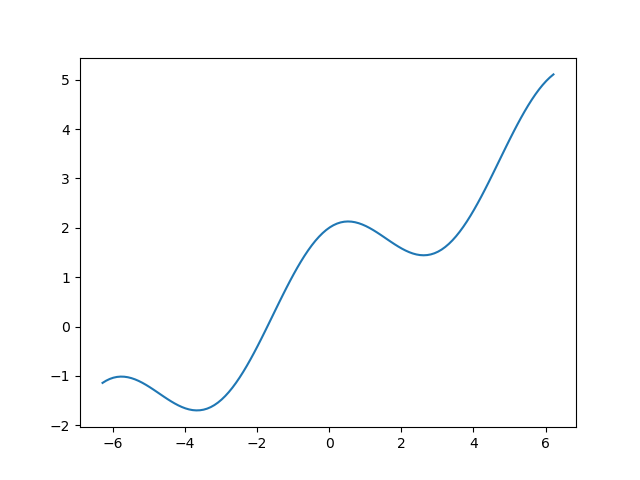

In [37]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(xs, ys)

### Opération sur les tableaux

Les opérations d'algèbre linéaire sont disponibles. 

Attention, pour effectuer une multiplication matricielle, il faut utiliser `@`.

In [38]:
A @ B

array([[19, 22],
       [43, 50]])

In [39]:
A_1 = np.linalg.inv(A)

In [40]:
identity = A @ A_1

### Types de données 

Contrairement au reste de python, les données stockées dans un tableau numpy sont typées. 

Cela implique les mêmes problèmes que l'on peut rencontrer en C (*overflow*, *casting*...) et que l'on a pas en python classique. 

Pour conntaire le type d'un tableau, on regarde son `dtype` (*data type*). Il est également possible de le renseigner. 

In [41]:
identity.dtype

dtype('float64')

In [42]:
t = np.ones((2, 2), dtype=np.complex) * (1+1j)
t

array([[1.+1.j, 1.+1.j],
       [1.+1.j, 1.+1.j]])

### Exemple d'overflow

En python, les entiers fonctionnent comme attendu. 

In [43]:
(2.1**128+1)**2

3.07708470749571e+82

Mais en numpy ils ont une taille mémoire fixée, et des informations sont perdues si on dépasse la capacité maximale. 

In [44]:
a = np.array([2.1], dtype=np.double)
print(a)
(a ** 128 + 1)**2
print(a)

[2.1]
[2.1]


In [45]:
plt.figure()
plt.plot(np.arange(1, 500, dtype=np.int8), label="Numpy (typé int8)")
plt.plot(range(500), label="Python pur")
plt.title("Impact de l'overflow")
plt.legend()

<IPython.core.display.Javascript object>